In [1]:
from unsuper import *

Using TensorFlow backend.


In [2]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os   # For os related operations
import sys  # For data size

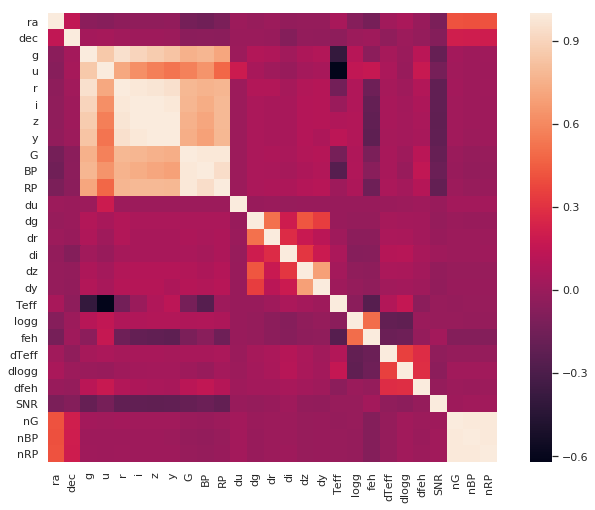

In [3]:
data = load_data(monte=True)

#fig = plt.figure(figsize=(10,10))
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

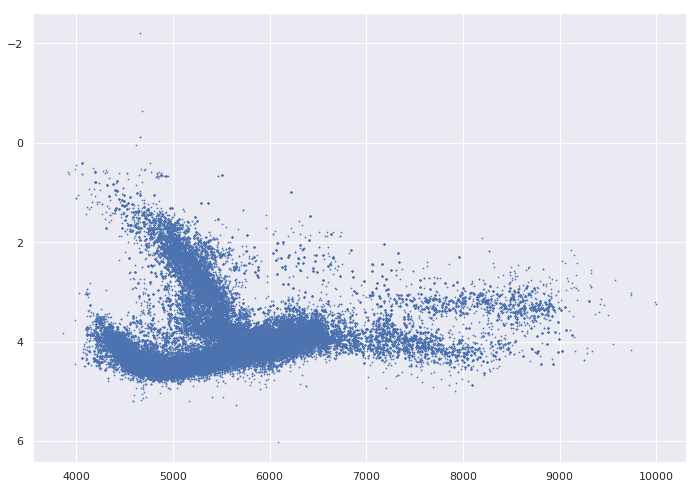

In [4]:
plt.scatter(data['Teff'], data['logg'], s=0.5)
plt.gca().invert_yaxis()

In [5]:
inputs_col = pd.DataFrame()

data['u-g']=data['u']-data['g']
data['g-r']=data['g']-data['r']
data['r-i']=data['r']-data['i']
data['i-z']=data['i']-data['z']
data['z-y']=data['z']-data['y']
data['u-G']=data['u']-data['G']
data['u-RP']=data['u']-data['RP']
data['u-BP']=data['u']-data['BP']

X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = data[['u', 'g', 'r', 'i', 'z', 'y', 'G', 'RP', 'RP']]

In [6]:
X

,u-g,g-r,r-i,i-z,z-y,u-G,u-RP,u-BP
0,1.283558,0.455223,0.239279,0.011969,0.077035,2.017891,2.539663,1.697775
1,1.426779,0.468462,0.197106,0.020985,0.073837,0.677806,1.331115,0.197722
2,0.939686,0.283112,0.094267,-0.019708,0.058956,0.554029,1.122765,0.173040
3,1.450616,0.427629,0.165534,0.061794,0.039734,0.663963,1.166646,0.335948
4,1.012555,0.315936,0.127328,0.025611,0.013550,-0.229760,0.352516,-0.638910
5,1.260665,0.406032,0.126048,0.015601,0.063679,2.937302,3.511534,2.521071
6,1.040873,0.316556,0.109306,0.012705,0.046319,2.198430,2.740170,1.820623
7,1.841138,0.678053,0.285396,0.113615,0.103454,2.542480,3.174522,2.077338
8,1.336290,0.449528,0.199852,0.062355,0.043140,1.800644,2.251635,1.520704
9,1.316293,0.491492,0.228914,0.095143,0.058032,2.291942,2.741369,2.008802


[8 8 8 ... 9 5 9]


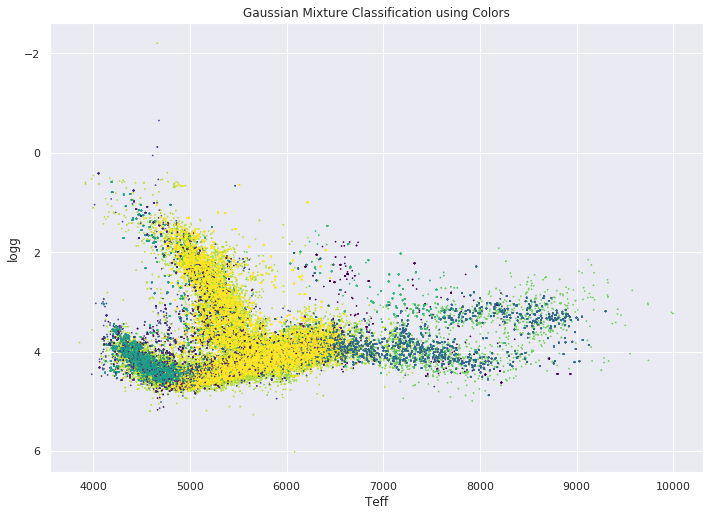

In [7]:
from sklearn.mixture import GaussianMixture
N = 10
X_train = X.sample(frac=0.8, random_state=99)
X_test = X.loc[~X.index.isin(X_train.index), :]
data_sample = data.sample(frac=0.2, random_state=99)

gmm = GaussianMixture(n_components=N).fit(X)
labels = gmm.predict(X)
print labels
data['labels'] = labels
plt.scatter(data['Teff'], data['logg'], c=labels, s=0.5, cmap='viridis')
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('logg')
plt.title('Gaussian Mixture Classification using Colors')
plt.savefig('gmm.png')

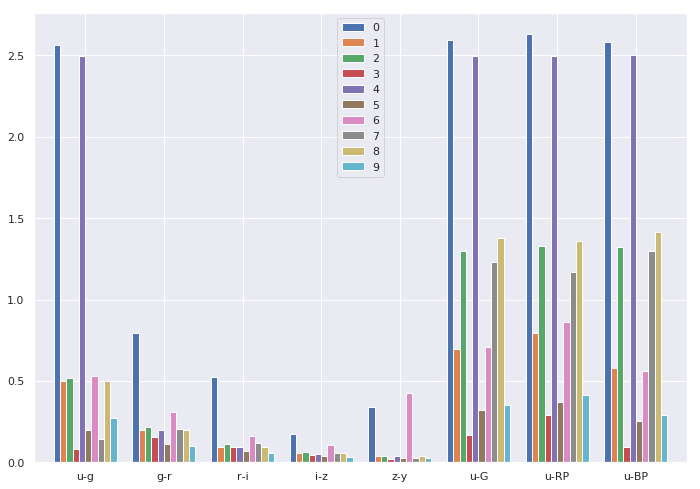

In [12]:
X_copy = X[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
result = pd.DataFrame()
for i in range(0, 10):
    #print X_copy[X['labels']==i].std(axis=0).to_frame()
    #print clust_label_stats
    result = pd.concat([result, (X_copy[data['labels']==i].std(axis=0)).to_frame().T], ignore_index=True)
    
result

ax = result.T.plot.bar(rot=0, width=0.8)

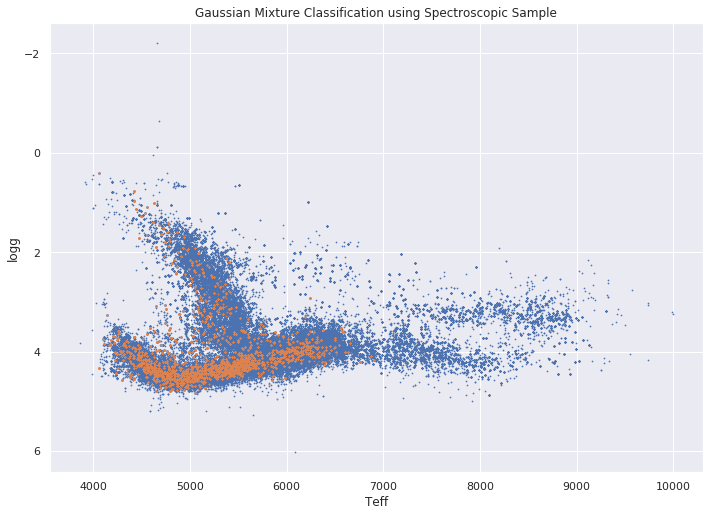

In [14]:
clusters = data[data['labels']==1]
plt.scatter(data['Teff'], data['logg'], s=0.5)
plt.scatter(clusters['Teff'], clusters['logg'], s=0.5)
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('logg')
plt.title('Gaussian Mixture Classification using Spectroscopic Sample')
plt.savefig('gmm.png')

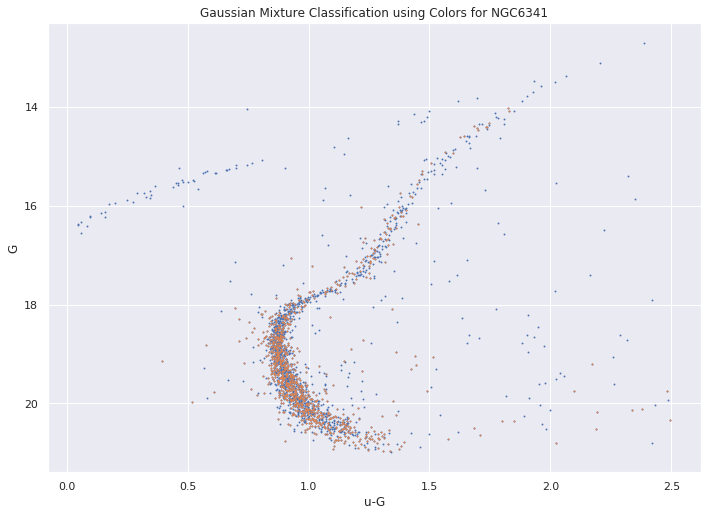

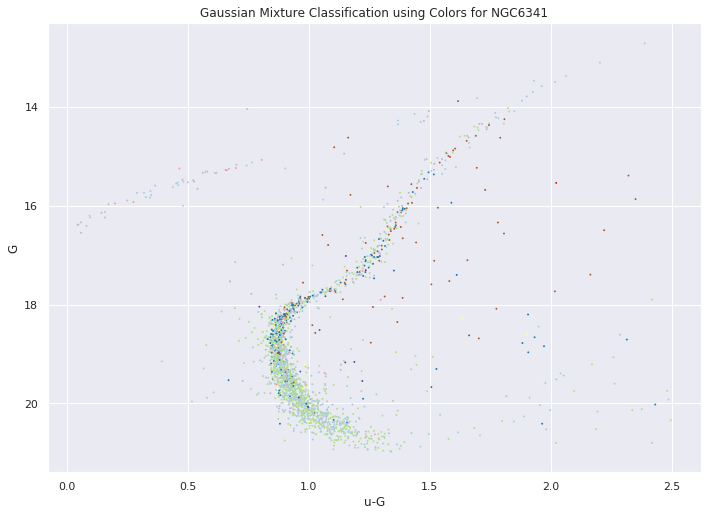

In [19]:
inputs_NGC6341 = load_data_glob('../../data/CFIS_PSf_Gaia_NGC6341.fits')

##############################
## NGC 6341 ##
##############################
criteria = criteria_function(inputs_NGC6341, 0.2, 2.5, 0)
inputs_NGC6341 = inputs_NGC6341[criteria]
inputs_NGC6341 = (inputs_NGC6341.dropna())
inputs_NGC6341_b = change_to_colour(inputs_NGC6341, inputs_col)

glob_labels = gmm.predict(inputs_NGC6341_b)
inputs_NGC6341['labels'] = glob_labels

clust = inputs_NGC6341[inputs_NGC6341['labels']==2]

plt.scatter((inputs_NGC6341['u']-inputs_NGC6341['G']).values, inputs_NGC6341['G'], s=0.8)
plt.scatter((clust['u']-clust['G']).values, clust['G'], s=0.7)
plt.gca().invert_yaxis()
plt.xlabel('u-G')
plt.ylabel('G')
plt.title('Gaussian Mixture Classification using Colors for NGC6341')
plt.savefig('ngc6341_gmm.png')
plt.show()

plt.scatter((inputs_NGC6341['u']-inputs_NGC6341['G']).values, inputs_NGC6341['G'], c=glob_labels, s=0.8, cmap=plt.cm.Paired)
plt.xlabel('u-G')
plt.gca().invert_yaxis()
plt.ylabel('G')
plt.title('Gaussian Mixture Classification using Colors for NGC6341')
plt.savefig('ngc6341_gmm.png')
plt.show()

In [12]:
from sklearn.feature_selection import RFE

In [13]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neural_network import MLPRegressor

cluster = normalize(data)
cluster['labels'] = labels

nn = MLPRegressor(hidden_layer_sizes=(8, 64, 128, 64, 1), warm_start=True,
                  max_iter=800, activation='tanh', learning_rate='adaptive', solver='adam')

clust = cluster
outputs = clust['feh'].copy()
inputs = clust[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-RP']].copy()

x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2)

nn.fit(x_train, y_train)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train, y_train)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

"""for i in range(0, 9):
    clust = cluster[cluster['labels']==i]
    outputs = clust['feh'].copy()
    inputs = clust[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-RP']].copy()
    
    x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2)
    
    nn.fit(x_train, y_train)
    
    print i, 'scored', nn.score(x_test, y_test), 'on', x_train.shape[0], 'samples'"""

ValueError: Input X must be non-negative.

In [ ]:
n_components = np.arange(1, 9)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')